# **Step 1 : Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import string

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


# **Step 2 : Read Data**

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)



df_all = concat_df(df_train, df_test)

In [3]:
df_all.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
391,21.0,NaN,S,7.7958,"Jansson, Mr. Carl Olof",0,392,3,male,0,1.0,350034
974,NaN,NaN,S,7.8958,"Demetri, Mr. Marinko",0,975,3,male,0,NaN,349238
191,19.0,NaN,S,13.0000,"Carbines, Mr. William",0,192,2,male,0,0.0,28424
558,39.0,E67,S,79.6500,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,559,1,female,1,1.0,110413
387,36.0,NaN,S,13.0000,"Buss, Miss. Kate",0,388,2,female,0,1.0,27849
218,32.0,D15,C,76.2917,"Bazzani, Miss. Albina",0,219,1,female,0,1.0,11813
1257,NaN,NaN,C,14.4583,"Caram, Mr. Joseph",0,1258,3,male,1,NaN,2689
1157,NaN,NaN,S,0.0000,"Chisholm, Mr. Roderick Robert Crispin",0,1158,1,male,0,NaN,112051
1183,NaN,NaN,C,7.2292,"Nasr, Mr. Mustafa",0,1184,3,male,0,NaN,2652
1006,18.0,NaN,C,14.4542,"Chronopoulos, Mr. Demetrios",0,1007,3,male,1,NaN,2680


# **Step 3 : Data Cleaning and Exploratory Data Analysis**

First of all, we need to preview the dataset and do the 4 C's of data cleaning based on the observations. 

4 C's of data: Correcting, Completing, Creating and Converting.[](http://)

# Step 3.1 : Correcting 


In [4]:
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effc6fb4dd0>,
      dtype=object)

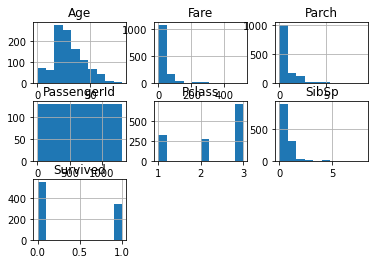

In [5]:
df_all.hist()

PassengerId is the unique id of the row and it doesn't have any effect on target

Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived

Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class

Name, Sex and Age are self-explanatory

SibSp is the total number of the passengers' siblings and spouse

Parch is the total number of the passengers' parents and children

Ticket is the ticket number of the passenger

Fare is the passenger fare

Cabin is the cabin number of the passenger

Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton



After plotting the histogram of each feature and reviewing the entire table of training set and the test set, there does not have any aberrant extremely unreasonable data inputs. Although, there are some potential outliers in age and fare, they are reasonable values, and they are just rare. Just like the tails of normal distributions. Therefore, I do not think it is necessary to correct any existing data.

# Step 3.2 : Completing

**Step 3.2.1 : missing Values -- Overview**

In [6]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


As you can see from above output that some features have lots of missing value. Let's have a detailed look. 

First, the output below describes the missing value in the train set. 

In [8]:
# Counting the total missing values in respective features
total_missing_train = df_train.isnull().sum().sort_values(ascending=False)

# Calculating the percent of missing values in respective features
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100


#w3resource.com/pandas/concat.php
train_missing_data = pd.concat([total_missing_train, percent_1], axis=1, keys=['Total', '%'])

print(total_missing_train)

train_missing_data.head() 

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


,Total,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000


Let's check the missing values in the test set as well. 

In [9]:
total_missing_test = df_test.isnull().sum().sort_values(ascending=False)

percent_2 = df_test.isnull().sum()/df_test.isnull().count()*100

test_missing_data = pd.concat([total_missing_test, percent_2], axis=1, keys=['Total', '%']) 

print(total_missing_test)

test_missing_data.head()

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64


,Total,%
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000


As seen from above, both training set and test set have lots of missing values in Age and Cabin. Roughly 78% of Cabin is missing and 20% of Age is missing. And missing values in Fare and Embarked can be ignored since the percentages are almost 0.

Missing values in Age can be filled with descriptive statistical measures but that wouldn't work for Cabin. Because the data type of Cabin is object instead of float, the missing value of Cabin cannot be filled with median or mean which is not applicable for Cabin.

**Step 3.2.2 : missing Values -- Age**

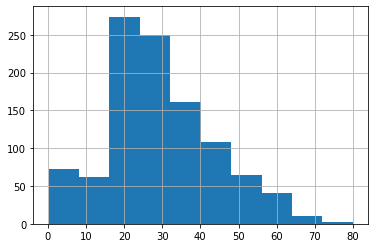

In [10]:
df_all["Age"].hist()

Here as we can see in the histogram of Age that there is no significant outliers so that both median or mean would work to replace the missing values in Age. I would like to use mean within each small group to replace the missing value, and to be as specific as possible, the small group here means a group of people who have same gender and Pclass. The mean ages below are used to fill the missing values in Age.

In [11]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).mean()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Mean age of Pclass {} {}s: {} '.format(pclass, sex, age_by_pclass_sex[sex][pclass].astype(int)))

# Filling the missing values in Age with the mean of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))
df_train['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))
df_test['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.mean()))

Mean age of Pclass 1 females: 37 
Mean age of Pclass 1 males: 41 
Mean age of Pclass 2 females: 27 
Mean age of Pclass 2 males: 30 
Mean age of Pclass 3 females: 22 
Mean age of Pclass 3 males: 25 


**Step 3.2.3 : missing Values -- Embarked**

In [12]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


Embarked is a categorical feature and there are only 2 missing values in whole data set. Both of those passengers are female, upper class and they have the same ticket number, fare and cabin. This is an evidence that they traveled together. 

When I googled Stone, Mrs. George Nelson (Martha Evelyn), I found that she embarked from S (Southampton) with her maid Amelie Icard, in this page [Martha Evelyn Stone: Titanic Survivor](http://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html). Therefore, we can fill the missing values of Embarked with category S confidently.

In [13]:
# Filling the missing values in Embarked with S
df_all['Embarked'] = df_all['Embarked'].fillna('S')
df_train['Embarked'] = df_train['Embarked'].fillna('S')

**Step 3.2.4 : missing Values -- Fare**

In [14]:
df_all[df_all['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


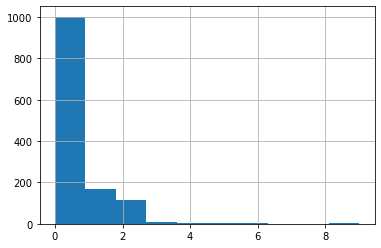

In [15]:
df_all["Parch"].hist()

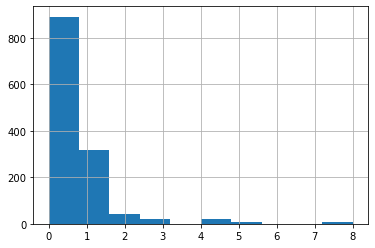

In [16]:
df_all["SibSp"].hist()

There is only one passenger with missing Fare value. With common sense, We know that fare is related to family size (Parch and SibSp) and Pclass features. From the histogram of Parch and SibSp, there is no outliers and all data points seems reasonable, and Pclass is a not-Null category variable without missing values. Therefore, Average(mean) of fare value of a male with a third class ticket and single (no Parch or SibSp) is a logical choice to fill the missing value.

In [17]:
mean_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp'])['Fare'].mean()[3][0][0]
# Mean of a Fare who is male with a third class ticket and travling alone) 

# Filling the missing value in Fare with the mean fare we get above.
df_all['Fare'] = df_all['Fare'].fillna(mean_fare)
df_test['Fare'] = df_test['Fare'].fillna(mean_fare)

**Step 3.2.5 : missing Values -- Cabin**

Almost 78% of the Cabin feature is missing and after google the background info,I found that the first letter of the Cabin values are the decks in which the cabins are located. Those decks were separated by passenger class, but some of them were used by multiple passenger classes.

On the Boat Deck there were 6 rooms labeled as T, U, W, X, Y, Z but only the T cabin is present in the dataset
A, B and C decks were only for 1st class passengers
D and E decks were for all classes
F and G decks were for both 2nd and 3rd class passengers

Let's have a close look at each deck. 

In [18]:
# Creating Deck column by extracting the first letter of the Cabin(string s) column M stands for Missing
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')


df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                        'Ticket']).rename(columns={'Name': 'Count'})

df_all_decks


Count
Deck Pclass       
A    1          22
B    1          65
C    1          94
D    1          40
     2           6
E    1          34
     2           4
     3           3
F    2          13
     3           8
G    3           5
M    1          67
     2         254
     3         693
T    1           1

From background info we know that decks are divided by Pclass and we can see from the table above that most of missing values of Cabin are from 2nd and 3rd class. So Cabin might be a helpful feature to predict if someone from 1st class survived or not, but it is not very helpful to predict someone from 2nd or 3rd class. In this way, the feature Cabin is kind of "biased" when running the prediction. And since Deck and Cabin is extreme highly related to Pclass, we can just drop the feature Cabin and use Pclass as one of the features to predict since Pclass has no missing value.

In [19]:
df_all.drop(columns = ['Deck'])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.000000,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.000000,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.000000,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.000000,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.000000,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,25.962264,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.000000,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.500000,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.962264,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


# Step 3.3 : Creating 

Since both Parch and SibSp features are descrbing one's family structure, it would make more sense if we combine these two features into one, which is "Family Size" each person has on the Titanic. In this way, we can reduce the dimension of features and it will be easier to use, also, it could show if someone is alone or not directly, here a value of 1 is considered 'Alone'.

In [20]:
data=df_train.copy() # shallow copy
data['Family_size'] = data1['SibSp'] + data1['Parch'] +1

Family_Size = data.groupby(['Family_size','Survived']).count().rename(columns={'Name': 'Count'}).drop(columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
print(Family_Size)
for family_size in [1,2,3,4,5,6,7]:
        print('survival rate of Family Size {} : {} '.format(family_size, Family_Size['Count'][family_size][1]/Family_Size['Count'][family_size].sum()))
        
print('survival rate of Family Size 8 : 0')
print('survival rate of Family Size 11 : 0')

NameError: name 'data1' is not defined

In [21]:
axes = sns.countplot(x = 'Family_size', hue='Survived', data=data )

ValueError: Could not interpret input 'Family_size'

Here we can see that the probabilty of survival is higher for someone who has his/her family size between 2 and 4, and the chance of survival is lower if someone's family size is less than 2 or larger than 4.

# Step 3.4 : Converting

For this dataset, I will convert some features into dummy variables to apply the machine learning models. 

# Step 3.5 : Exploratory Data Analysis -- Continuous Features

There are 2 continuous features :Age and Fare. Both of them have good split points and spikes of survival rate. The distribution has more spikes and bumps in training set, but it is smoother in test set. Therefore, the model generated by the training set may be overfitted and it may not be optimal for the test set.

From the distribution of Age we can see that the probability of survival for individuals younger than 15 is higher than other age droups, which is corresponding to our common sense that: ladies and children first.

The distribution of Fare is positively skewed because of the larger value of fare generated by larger family size and higher Pclass. And the survival rate is higher on the tails since the almost all lower fares mean lower class and traveling alone.

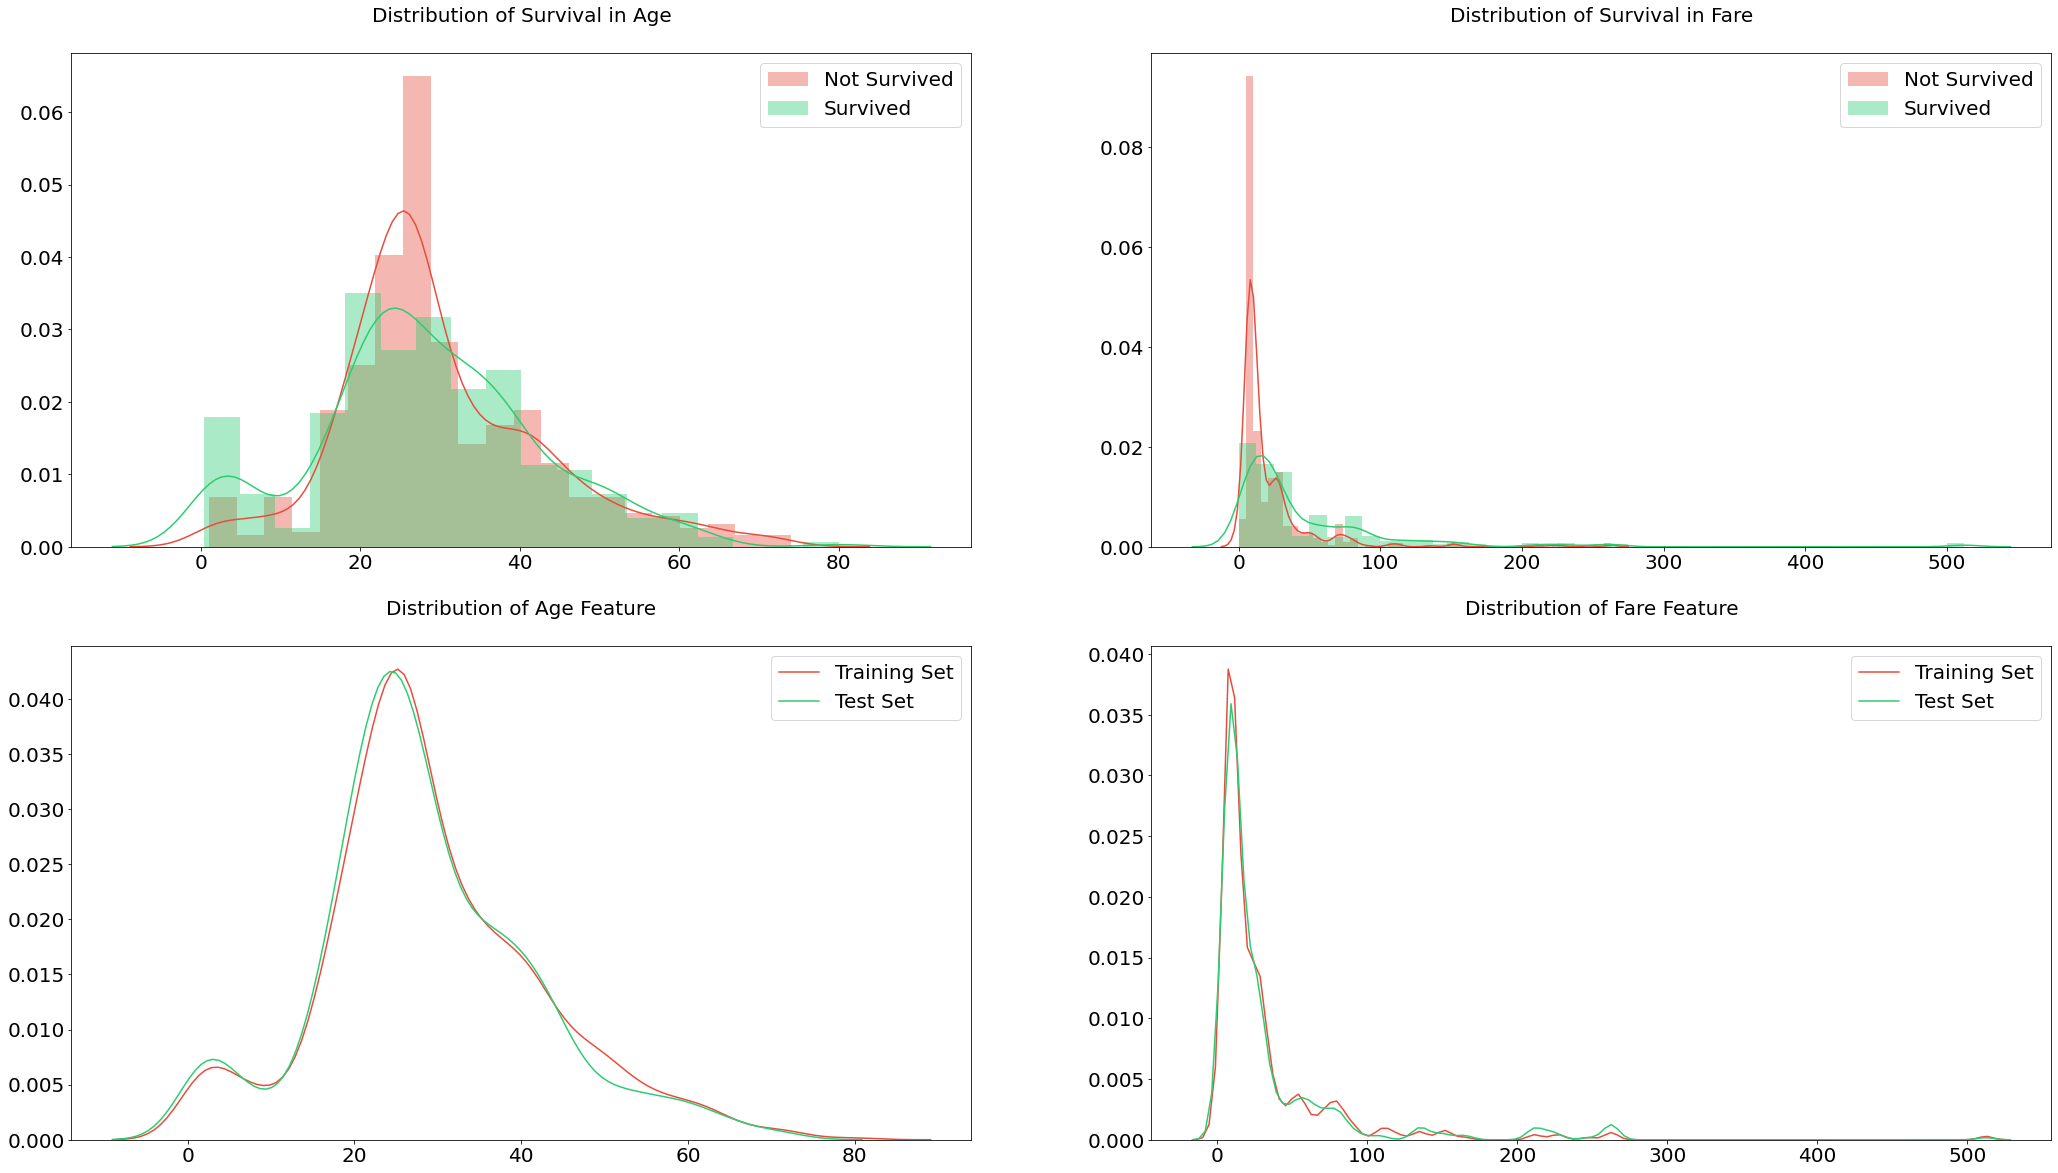

In [22]:
cont_features = ['Age', 'Fare']
surv = df_train['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features): 
    sns.distplot(df_train[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i]) 
    sns.distplot(df_train[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(df_train[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
     
    # just providing the ticks for x & y axis in respective plots    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

# Step 3.6 : Exploratory Data Analysis -- Categorical Features

From the histograms below, we can see that every categorical feature has one class with significant  higher mortality rate:

* Embarked: Passengers boarder from Southampton have significant higher death rate;
* Parch & SibSp: Passengers with zero Parch or zero Sibsp have the much higher death rate, and this also shows that most of passengers are traveling alone;
* Pclass: Passengers from third class have lower survival rate compared to the other two classes, especially first class;
* Sex: The survival rate of male is much much lower than the survival rate of female. This is a powerful evidence that females are more likely to survive. 


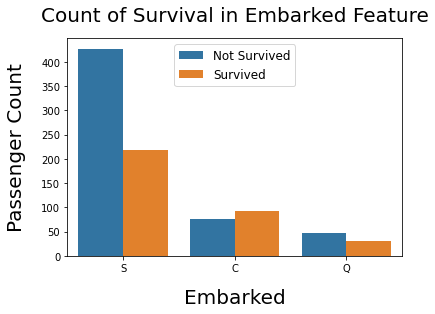

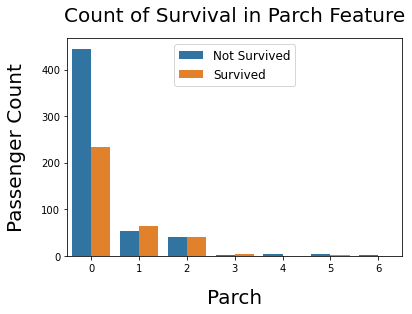

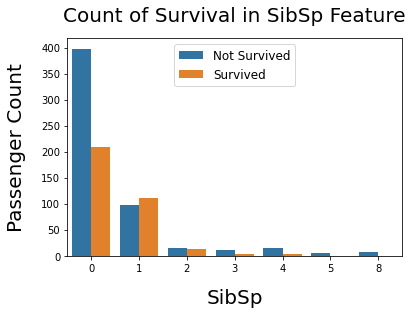

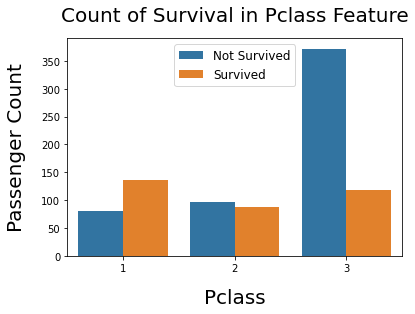

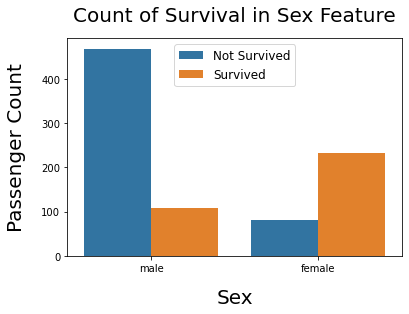

In [23]:
features = ['Embarked', 'Parch', 'SibSp' , 'Pclass', 'Sex' ]

for feature in (features):    
    
    sns.countplot(x=feature, hue='Survived', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
   
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 12})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

    plt.show()

# Step 3.7 : Exploratory Data Analysis -- Correlation Between The Features

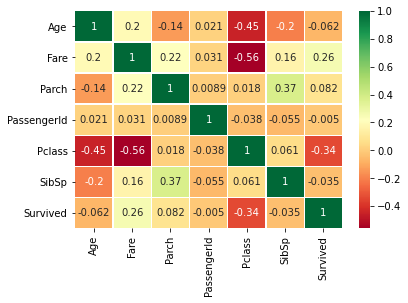

In [24]:
sns.heatmap(df_all.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig.set_size_inches(10,8)
plt.show()

From the heat map we can see a few features are correlated to some certain level:
* Age & Pclass (-0.45): Most passengers of first class are wealthy people and they are not young since they need time to gain their wealth. This follows our common sense.
* Fare & Pclass (-0.56): This is also straightforward that first class are much more expensive than the third class.
* Fare & Survived (0.26): Since Fare is highly related to Pclass, and people from third class are less likely to survive. It is also easily to understand.
* Parch & SibSp (0.37): Both features measure the family size of a passenger. 
* Pclass & Survived (-0.34): This is mentioned above in the Fare & Survived which is not odd at all.

# Step 4 : Feature Engineering

**Step 4.1 : Feature Engineering -- Fare**

For Fare,10 quantile based bins are used for the following histograms.

From the first histogram below we can see that the Fare feature is right skewed and the number of passengers survived is approximately increasing as the value of Fare increases, as we can see the yellow bar is getting higher and higher. And the survival rate within each bin is approximately increasing as well.

This pattern can be explain by the second histogram below. The second histogram describes the  relationship between Fare and Pclass and the result highly comform to the result of hotmap above that the Fare is highly related to the Pclass. As we can see from this histogram, the first class has the most expensive fares and the lowest fares are occupied by third class only. The number of passengers from higher classes are increasing as the Fare increases, and this "right skewed" pattern is exactly what we are seeing from the histogram of "Count of Survival in Fare Feature". 



In [25]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 10)

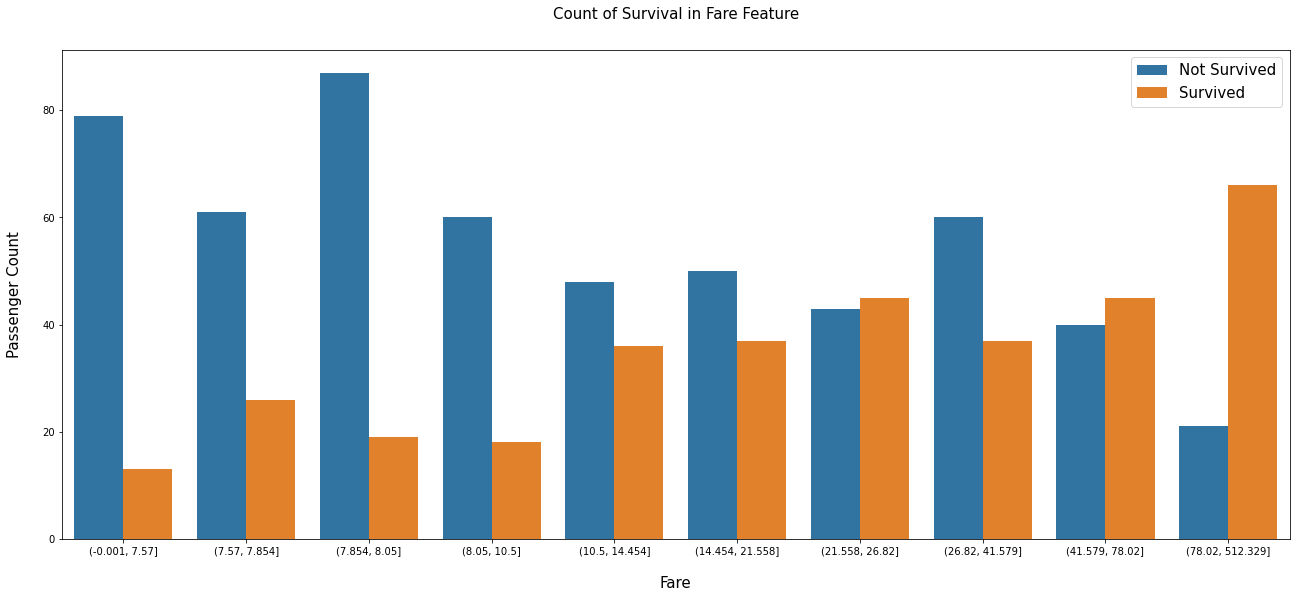

In [26]:
plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

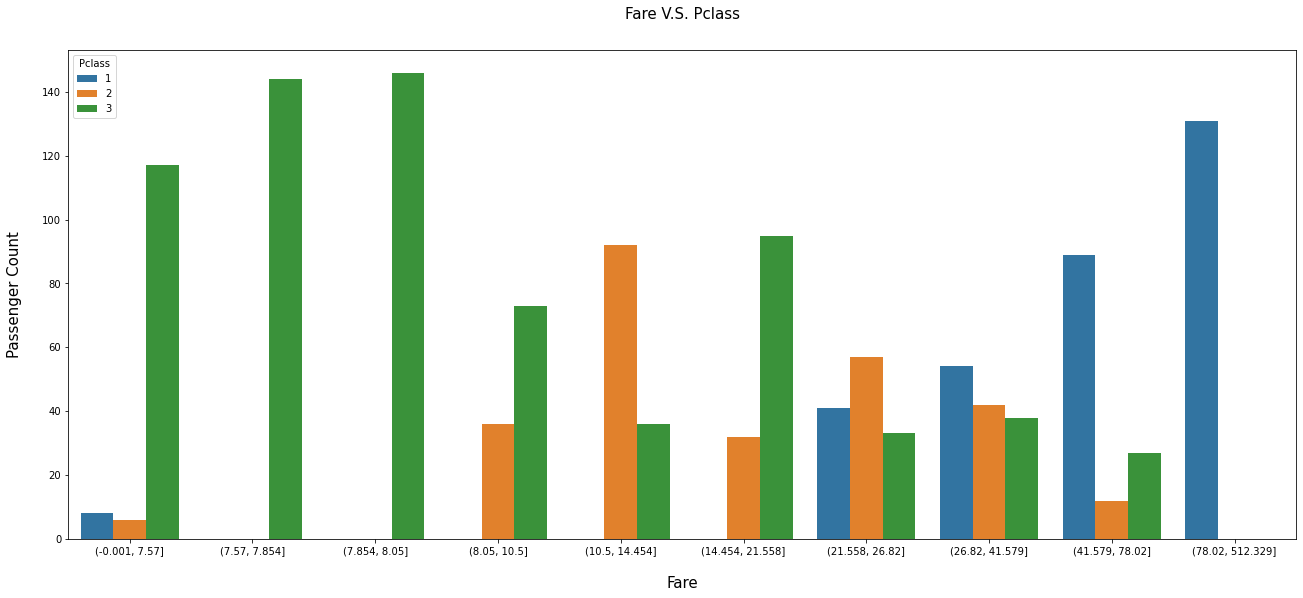

In [27]:
plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Pclass', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)

plt.title('Fare V.S. Pclass'.format('Fare'), size=15, y=1.05)

plt.show()

**Step 4.2 : Feature Engineering -- Age**

Since there are some missing values for Age and we filled the missing values with the average age based on sex and Pclass, we need to double check if there is any missing values for Age. And we can see from the output below that all missinge value for Age are filled properly.

In [28]:
df_all['Age'].isnull().sum()

0

Base on the histogram of Age and the descriptivestatistics, the Age feature is kind of normally distributed and the center is around 30. And we can see from the plot below that certain age groups have higher survival rate such as children under 16 and some age groups have lower survival rate such as [16.0, 21.0] and [22.185, 25.962]. This means the Age feature should be considered if we want to fit a model. 

count    1309.000000
mean       29.376186
std        13.169015
min         0.170000
25%        22.000000
50%        26.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

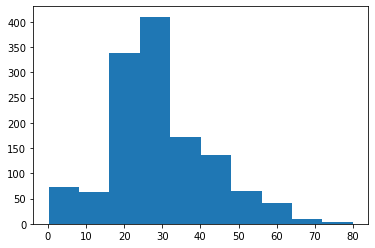

In [29]:
plt.hist(df_all['Age'])
df_all['Age'].describe()

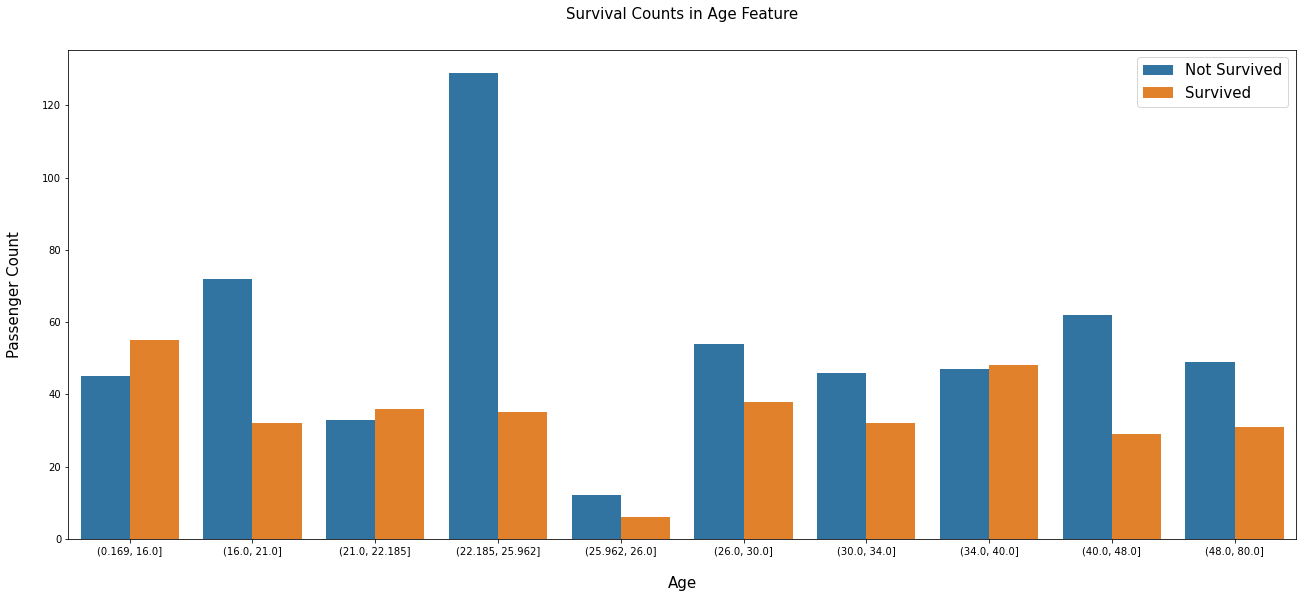

In [30]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)


plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

**Step 4.3 : Feature Engineering -- Ticket**

The data type of Ticket feature is "object" and as we see from the random sample below that the data of Ticket feature is not consistent and is neither continuous nor categorical. It's just a series of combination of numbers and letters without any rule or regular pattern.

Therefore, the feature Ticket should be dropped too. 

In [31]:
type(df_all['Ticket'])
df_all['Ticket'].sample(15)

329              111361
732              239855
884     SOTON/OQ 392076
82               330932
388              367655
283          A/5. 10482
1255              11765
268            PC 17582
1045             347077
1064               2673
437               29106
489          C.A. 37671
796               17465
70           C.A. 33111
1011         C.A. 33595
Name: Ticket, dtype: object

**Step 4.4 : Feature Engineering -- Embarked**

As we see from the graph and the output below, passengers boarded from Cherbourg have the higher survival rate. This feature should be considered if we want to fit a model because the passenger is more likely to survive if he/she boarded from Cherbourg.

In [32]:
data1=df_train.copy()

Embarked = data1.groupby(['Embarked','Survived']).count().rename(columns={'Name': 'Count'}).drop(columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin'])
print(Embarked)

for e in ["C","Q","S"]:
        print('survival rate of Embarked {} : {} '.format(e, Embarked['Count'][e][1]/Embarked['Count'][e].sum()))
        

                   Count
Embarked Survived       
C        0            75
         1            93
Q        0            47
         1            30
S        0           427
         1           219
survival rate of Embarked C : 0.5535714285714286 
survival rate of Embarked Q : 0.38961038961038963 
survival rate of Embarked S : 0.33900928792569657 


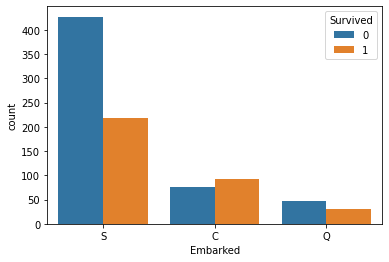

In [33]:
sns.countplot(x='Embarked',hue='Survived',data=df_train)

**Step 4.5 : Feature Engineering -- Family Size : Parch + SibSp**

As we mentioned before in Step 3, both Parch and SibSp features are descrbing one's family structure, and we are going to combine these two features "Family Size". If someone is traveling alone then he/she will have a family size of 1. 

Here, as we can see from the first bar chart that a individual who has family size of 2,3,4 is more likely to survive and the survival rate of family size 2,3,4 are much higher than others. Based on common sense we know that a family with 2 to 4 family members is very common and it is the most popular family structure. So here, after family size are calculated from Parch and SibSp, I divide the Family Size into 3 groups which are: Alone(1), Normal(2-4) and Large(5-11). 

From the second bar chart we can see that if someone is grouped into "Normal" based on the family size he/she has, then this individual has much higher probability of survival compared to others from "Alone" or "Large". This conclusion is evidented by the probability too. 

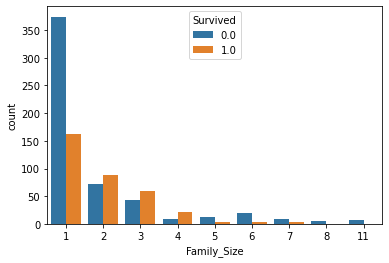

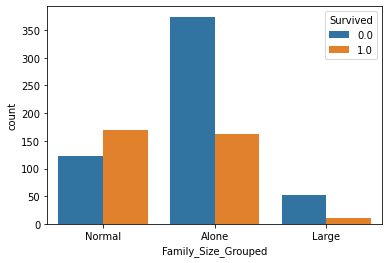

In [34]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1
sns.countplot(x='Family_Size', hue='Survived', data=df_all)
plt.show()

# Mapping Family Size
family_map = {1: 'Alone', 2: 'Normal', 3: 'Normal', 4: 'Normal', 5: 'Large', 6: 'Large', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all)




In [35]:
data2 = df_train.copy()

data2['Family_Size'] = data2['SibSp'] + data2['Parch'] + 1
family_map = {1: 'Alone', 2: 'Normal', 3: 'Normal', 4: 'Normal', 5: 'Large', 6: 'Large', 7: 'Large', 8: 'Large', 11: 'Large'}
data2['Family_Size_Grouped'] = data2['Family_Size'].map(family_map)

group = data2.groupby(['Family_Size_Grouped','Survived']).count().rename(columns={'Name': 'Count'}).drop(columns = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Family_Size'])
print(group)

for f in ['Normal','Alone','Large']:
        print('survival rate of Family_Size_Grouped {} : {} '.format(f, group['Count'][f][1]/group['Count'][f].sum()))

                              Count
Family_Size_Grouped Survived       
Alone               0           374
                    1           163
Large               0            52
                    1            10
Normal              0           123
                    1           169
survival rate of Family_Size_Grouped Normal : 0.5787671232876712 
survival rate of Family_Size_Grouped Alone : 0.30353817504655495 
survival rate of Family_Size_Grouped Large : 0.16129032258064516 


**Step 4.6 : Feature Engineering -- Conclusion**

After the feature engineering, we have examined and dropped 4 original features: SibSp, Parch, Ticket, and Carbin. And we created one more feature which is Family_Size_Grouped. Here I set the Embarked feature to numbers so that we can covert it to dummy variable easily and precisely. And also, all remaining features will be converted to dummy variables later to apply machine learning models.

Features I selected are:Fare, Age, Embarked, Pclass, Sex and Family_Size_Grouped.

In [36]:
df_test['Family_Size'] = df_test['SibSp'] + df_test['Parch'] + 1
family_map = {1: 'Alone', 2: 'Normal', 3: 'Normal', 4: 'Normal', 5: 'Large', 6: 'Large', 7: 'Large', 8: 'Large', 11: 'Large'}
df_test['Family_Size_Grouped'] = df_test['Family_Size'].map(family_map)

df_train['Family_Size'] = df_train['SibSp'] + df_train['Parch'] + 1
family_map = {1: 'Alone', 2: 'Normal', 3: 'Normal', 4: 'Normal', 5: 'Large', 6: 'Large', 7: 'Large', 8: 'Large', 11: 'Large'}
df_train['Family_Size_Grouped'] = df_train['Family_Size'].map(family_map)


df_train["Embarked"][df_train["Embarked"]=="C"] = 0
df_train["Embarked"][df_train["Embarked"]=="Q"] = 1
df_train["Embarked"][df_train["Embarked"]=="S"] = 2

df_test["Embarked"][df_test["Embarked"]=="C"] = 0
df_test["Embarked"][df_test["Embarked"]=="Q"] = 1
df_test["Embarked"][df_test["Embarked"]=="S"] = 2

# Step 5 : Machine Learning Models

Now, after confirmed that there is no missing values at all, we are going to train some Machine Learning models and select the best model to conduct the cross validation process based on their  average training accuracy (ACC score). 

First, we need to set the train set and the test set.

In [37]:
y = df_train["Survived"]

features = ["Pclass", "Sex", "Age",'Family_Size_Grouped',"Embarked",'Fare']
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))
print('X_test shape: {}'.format(X_test.shape))


X shape: (891, 11)
y shape: (891,)
X_test shape: (418, 11)


**Step 5.1 : Machine Learning Models -- Model Comparison**

Step 5.1.1 : Stochastic Gradient Descent (SGD):

In [38]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, y)
y_pred = sgd.predict(X_test)

sgd.score(X, y)

acc_sgd = round(sgd.score(X, y) * 100, 2)

Step 5.1.2 : Random Forest

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

y_prediction = random_forest.predict(X_test)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

Step 5.1.3 : Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X, y)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X, y) * 100, 2)

Step 5.1.4 : K Nearest Neighbor

In [41]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X, y)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X, y) * 100, 2)

Step 5.1.5 : Gaussian Naive Bayes

In [42]:
gaussian = GaussianNB() 
gaussian.fit(X, y)  
y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X, y) * 100, 2)

Step 5.1.6 : Perceptron

In [43]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X, y)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X, y) * 100, 2)

Step 5.1.7 : Linear Support Vector Machine

In [44]:
linear_svc = LinearSVC()
linear_svc.fit(X, y)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X, y) * 100, 2)

Step 5.1.8: Decision Tree

In [45]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, y)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)

Step 5.1.9 Result Comparison

In [46]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.20,Random Forest
98.20,Decision Tree
84.40,KNN
82.04,Support Vector Machines
81.93,Logistic Regression
79.12,Naive Bayes
72.05,Stochastic Gradient Decent
66.44,Perceptron


As the result shown that Random Forest has the best average training accuracy, therefore, we are choosing Random Forest to perform cross validation.

**Step 5.2 : K-Fold Cross Validaton**

The K-Fold Cross Validation randomly splits the training data into K subsets called folds. The random forest model would be trained and evaluated K times, using a different fold for evaluation everytime, while it would be trained on the remaining K-1 folds. Here I set K=10, the mean and the standard deviation are calculated as well.

In [47]:
from sklearn.model_selection import cross_val_score

# K = 10
ran_for = RandomForestClassifier(n_estimators=100,oob_score=True)
scores = cross_val_score(ran_for, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.84269663 0.74157303 0.80898876 0.86516854 0.79775281
 0.83146067 0.75280899 0.84269663 0.85393258]
Mean: 0.8103745318352059
Standard Deviation: 0.04189605250602086


In [48]:
# K = 10
ran_for.fit(X, y)
y_prediction = ran_for.predict(X_test)

ran_for.score(X, y)

acc_random_forest = round(ran_for.score(X, y) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.2 %


Here we can see that the average accuracy of Random Forest model after cross validation is about 81.6% with a standard deviation about 4%. This accuracy is more realistic than the ACC score which is 98.2%. Also, the accuray of 81.6% is good enough for a model with only 11 dummy variables generated by: Fare, Age, Embarked, Pclass, Sex and Family_Size_Grouped, where Age and Fare are still continuous features. And the 4% of standard deviation tolds us the prediction genereted by this model is reliable as well. The consistency does not fall a lot after I reduced a lot of features. 

**Step 5.3 :  Feature Importance**

From the table below we can see the relative importance of each feature. The table shows that Fare and Age are the most important features with importance rate about 0.3. I have to say that 0.3 is a large number for the relative importance Because we want to has many features and all features contribute a bit to predicting the target. But the more features we have, the more likely the model is overfitting the training data. Here I would like to say 0.3 is a reasonable number for Fare and Age since I left them as continuous features and I did not convert them into categorical features. I believe the relative importance will decrease if we convert all features into categorical features. 

In [49]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(ran_for.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(11)

,importance
feature,
Age,0.283
Fare,0.269
Sex_male,0.149
Sex_female,0.129
Pclass,0.078
Family_Size_Grouped_Large,0.023
Family_Size_Grouped_Normal,0.022
Family_Size_Grouped_Alone,0.016
Embarked_2,0.012


There is another method mentioned in others notebook which is out-of-bag estimate. It is as accurate as using a test set of the same size as the training set. We can conduct a out-of-bag estimate to see how well the Random Forest Model does. From the output below we see that the accuracy is still around 81.7% which means the Random Forest Model is doing well even I left Age and Fare as continuous features. 

In [50]:
print("out-of-bag score:", round(ran_for.oob_score_, 4)*100, "%")

out-of-bag score: 81.47999999999999 %


**Step 5.4 : F1-Score and ROC-AUC Score**



Step 5.4.1 : F1-Score

In [51]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(random_forest, X, y, cv=3)

In [52]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y, pred))
print("Recall:",recall_score(y, pred))

Precision: 0.7537993920972644
Recall: 0.7251461988304093


Our model predicts 76% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 74 % of the people who actually survived.

In [53]:
from sklearn.metrics import f1_score
F1_score = f1_score(y, pred)
print(F1_score)

0.7391952309985097


Here we have F-score of 75 %. But unfortunately the F-score is not good-looking but acceptable for the model I fit. Because I did not convert Age and Fare into categorcial features and the recall is not high either which is 74%

Step 5.4.2 : ROC-AUC Score

In [54]:
# getting the probabilities of our predictions
from sklearn.metrics import roc_auc_score
y_scores = random_forest.predict_proba(X)
y_scores = y_scores[:,1]

roc_auc_score = roc_auc_score(y, y_scores)
print("ROC-AUC-Score:", roc_auc_score)

ROC-AUC-Score: 0.9972597705557154


A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5. Here, The ROC-AUC score for my model is surperisingly high which is good. 

# Step 6 : Final Output

My prediction has a public score about 70% on Kaggle which is reasonable for the model I set. I believe the score will be improved if I convert Age and Fare into categorical features. 

In [55]:
output = pd.DataFrame({"PassengerId": df_test["PassengerId"],"Survived": y_prediction})

output.to_csv('shaoshizhang.csv', index=False)